## **Pingouin Library**

In [2]:
!pip install pingouin

# **Try**

### **T-test**

In [3]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

ttest_df = pg.ttest(x, y)

In [4]:
ttest_df.to_csv('ttest.csv')

### **Pearson's correlation**

In [5]:
corr_df = pg.corr(x, y)
corr_df.to_csv('correlation.csv')
corr_df

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


### **Q-Q plot**

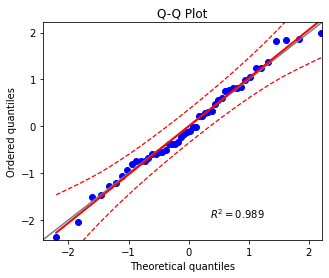

In [6]:
import numpy as np
import pingouin as pg
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

### **Multiple linear regression**

#### **Artificial dataset***

In [7]:
import pandas as pd
np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

In [8]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.110648,0.950840,4.323175,0.000187,0.393145,0.348193,2.159686,6.061611
1,X,0.466201,0.123402,3.777904,0.000794,0.393145,0.348193,0.213001,0.719401
2,Z,-0.202219,0.152780,-1.323597,0.196736,0.393145,0.348193,-0.515696,0.111259


#### **Boston housing dataset**

In [9]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)


In [10]:
pg.linear_regression(X, y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.459488,5.103459,7.144074,3.283439e-12,0.740643,0.73379,26.432226,46.486751
1,x1,-0.108011,0.032865,-3.286517,1.086810e-03,0.740643,0.73379,-0.172584,-0.043438
2,x2,0.046420,0.013727,3.381576,7.781097e-04,0.740643,0.73379,0.019449,0.073392
3,x3,0.020559,0.061496,0.334310,7.382881e-01,0.740643,0.73379,-0.100268,0.141385
4,x4,2.686734,0.861580,3.118381,1.925030e-03,0.740643,0.73379,0.993904,4.379563
5,x5,-17.766611,3.819744,-4.651257,4.245644e-06,0.740643,0.73379,-25.271634,-10.261589
6,x6,3.809865,0.417925,9.116140,1.979441e-18,0.740643,0.73379,2.988727,4.631004
7,x7,0.000692,0.013210,0.052402,9.582293e-01,0.740643,0.73379,-0.025262,0.026647
8,x8,-1.475567,0.199455,-7.398004,6.013491e-13,0.740643,0.73379,-1.867455,-1.083679
9,x9,0.306049,0.066346,4.612900,5.070529e-06,0.740643,0.73379,0.175692,0.436407


#### **Integration with Pandas**

In [11]:
boston = load_boston()

In [12]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [13]:
df['MEDV'] = pd.Series(boston.target)

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
df.pairwise_corr(columns=['CRIM','ZN', 'INDUS'], covar = ['MEDV'])

,X,Y,method,covar,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,CRIM,ZN,pearson,['MEDV'],two-sided,506,-0.07039,"[-0.16, 0.02]",0.004955,0.000998,-0.070507,1.137776e-01,0.194,0.353149
1,CRIM,INDUS,pearson,['MEDV'],two-sided,506,0.27122,"[0.19, 0.35]",0.073560,0.069877,0.278181,5.557512e-10,1.188e+07,0.999991
2,ZN,INDUS,pearson,['MEDV'],two-sided,506,-0.44032,"[-0.51, -0.37]",0.193881,0.190676,-0.472627,2.069049e-25,1.739e+22,1.000000


In [16]:
df.pcorr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.107320,-0.034494,-0.028606,-0.087797,0.031627,0.003651,-0.155989,0.288382,-0.033037,-0.065407,-0.092116,0.074930,-0.146568
ZN,0.107320,1.000000,-0.107388,-0.006529,-0.003696,0.085166,-0.119638,0.425310,-0.133104,0.240322,-0.245256,-0.012129,0.111314,0.150712
INDUS,-0.034494,-0.107388,1.000000,0.099892,0.261415,-0.090749,0.001066,-0.195464,-0.275587,0.435392,0.128115,-0.035185,0.075411,0.015070
CHAS,-0.028606,-0.006529,0.099892,1.000000,0.061087,-0.024369,0.049950,0.029236,0.075973,-0.098359,-0.044694,0.028703,0.005519,0.139218
NOX,-0.087797,-0.003696,0.261415,0.061087,1.000000,-0.006593,0.259980,-0.326691,0.178003,0.042201,-0.370517,-0.040703,-0.025767,-0.205231
RM,0.031627,0.085166,-0.090749,-0.024369,-0.006593,1.000000,0.190351,0.003084,0.065747,-0.012359,-0.021565,-0.154411,-0.287682,0.380135
AGE,0.003651,-0.119638,0.001066,0.049950,0.259980,0.190351,1.000000,-0.275593,-0.074694,0.029972,0.075027,0.062599,0.310129,0.002362
DIS,-0.155989,0.425310,-0.195464,0.029236,-0.326691,0.003084,-0.275593,1.000000,0.049696,-0.028015,-0.014322,0.028273,-0.100704,-0.316394
RAD,0.288382,-0.133104,-0.275587,0.075973,0.178003,0.065747,-0.074694,0.049696,1.000000,0.792942,0.239247,-0.101442,0.117708,0.203609
TAX,-0.033037,0.240322,0.435392,-0.098359,0.042201,-0.012359,0.029972,-0.028015,0.792942,1.000000,0.025293,-0.003454,-0.075578,-0.146284
